# **¿Qué es el sistema de recomendación?**

Un sistema de recomendación es un tipo de sistema de filtrado de información. Al extraer grandes conjuntos de datos, el algoritmo del sistema puede identificar con precisión las preferencias del usuario. Una vez que se conoce lo que les gusta a los usuarios, se puede recomendarles contenido nuevo y relevante. Esto aplica a todo, desde películas y música hasta parejas.

El rápido crecimiento de la recopilación de datos ha dado lugar a una nueva era de la información. Los datos se utilizan para crear sistemas más eficientes, y aquí es donde entran en juego los sistemas de recomendación. Los sistemas de recomendación son un tipo de sistema de filtrado de información, ya que mejoran la calidad de los resultados de búsqueda y ofrecen elementos más relevantes para la búsqueda o relacionados con el historial de búsqueda del usuario.

Netflix, YouTube, Tinder y Amazon son ejemplos de sistemas de recomendación en uso. Estos sistemas atraen a los usuarios con sugerencias relevantes basadas en sus elecciones. Amazon los utiliza para sugerir productos a los clientes, YouTube para decidir qué vídeo reproducir automáticamente a continuación, y Facebook para recomendar páginas que les gusten y personas a las que seguir. Además, empresas como Netflix y Spotify dependen en gran medida de la eficacia de sus motores de recomendación para el éxito de sus negocios.

# Let's start with the code.

## Importing Libraries

In [3]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [6]:
netflix_dataset=pd.read_csv("./combinado.csv")
netflix_dataset.head()

,show_id,country,vote_count,duration,title,director,release_year,popularity,revenue,rating,language,vote_average,cast,genres,date_added,budget,description,type
0,33238,South Korea,187,1 Seasons,Running Man,안재철,2010,1929.898,NaN,8.241,ko,8.241,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...","Comedy, Reality",2010-07-11,NaN,A reality and competition show where members a...,TV Show
1,32415,United States of America,229,1 Seasons,Conan,NaN,2010,1670.580,NaN,7.035,en,7.035,"Conan O'Brien, Andy Richter","Talk, Comedy, News",2010-11-08,NaN,A late night television talk show hosted by C...,TV Show
2,37757,Greece,6,1 Seasons,MasterChef Greece,NaN,2010,1317.092,NaN,5.600,el,5.600,NaN,Reality,2010-10-03,NaN,MasterChef Greece is a Greek competitive cooki...,TV Show
3,75685,Czech Republic,6,1 Seasons,Prostřeno!,NaN,2010,1095.776,NaN,6.500,cs,6.500,"Václav Vydra, Jana Boušková",Reality,2010-03-01,NaN,The knives (and forks) are out as a group of s...,TV Show
4,33847,"United States of America, Ireland",12,1 Seasons,The Talk,NaN,2010,712.070,NaN,3.400,en,3.400,"Amanda Kloots, Jerry O'Connell, Akbar Gbaja-Bi...",Talk,2010-10-18,NaN,A panel of well-known news and entertainment p...,TV Show


In [3]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       32000 non-null  int64  
 1   country       29737 non-null  object 
 2   vote_count    32000 non-null  int64  
 3   duration      16000 non-null  object 
 4   title         32000 non-null  object 
 5   director      20903 non-null  object 
 6   release_year  32000 non-null  int64  
 7   popularity    32000 non-null  float64
 8   revenue       16000 non-null  float64
 9   rating        32000 non-null  float64
 10  language      32000 non-null  object 
 11  vote_average  32000 non-null  float64
 12  cast          30639 non-null  object 
 13  genres        30919 non-null  object 
 14  date_added    32000 non-null  object 
 15  budget        16000 non-null  float64
 16  description   28662 non-null  object 
 17  type          32000 non-null  object 
dtypes: float64(5), int64(3), o

In [4]:
dict = {}
for i in list(netflix_dataset.columns):
    dict[i] = netflix_dataset[i].value_counts().shape[0]
    
print(pd.DataFrame(dict,index = ["unique count"]).transpose())

              unique count
show_id              31594
country               1745
vote_count            2902
duration                 1
title                30639
director             13011
release_year            16
popularity           24159
revenue               5327
rating                2728
language                83
vote_average          2728
cast                 30230
genres                3895
date_added            5504
budget                 958
description          28636
type                     2


show_id does represents the primary key of the datasets.
There are only two types of Netflix content type, where as others are distributed in wide range will need futher analysis with graphs.

In [5]:
print('Table of missing values: ')
print(netflix_dataset.isnull().sum())

Table of missing values: 
show_id             0
country          2263
vote_count          0
duration        16000
title               0
director        11097
release_year        0
popularity          0
revenue         16000
rating              0
language            0
vote_average        0
cast             1361
genres           1081
date_added          0
budget          16000
description      3338
type                0
dtype: int64


# Exploratory Data Analysis(EDA)

## Analysis of Movies vs TV Shows

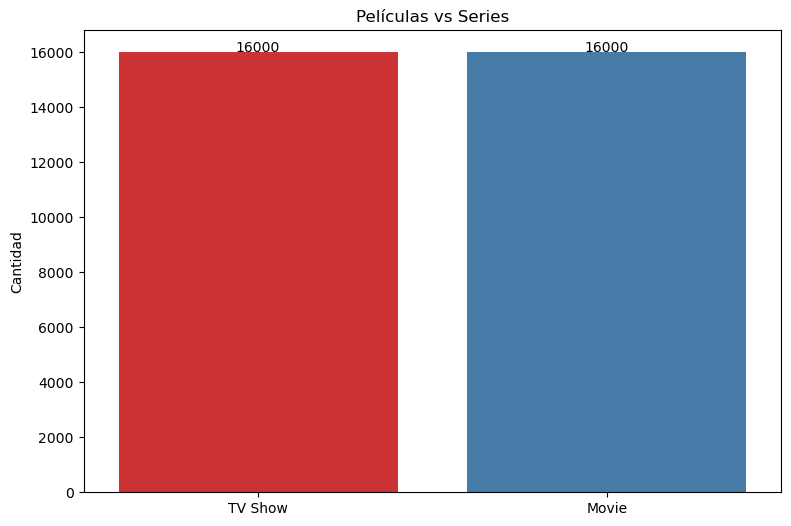

In [8]:
netflix_shows=netflix_dataset[netflix_dataset['type']=='TV Show']
netflix_movies=netflix_dataset[netflix_dataset['type']=='Movie']

plt.figure(figsize=(9,6))
sns.countplot(data=netflix_dataset, x='type', palette="Set1")
plt.title('Películas vs Series')
plt.xlabel('')
plt.ylabel('Cantidad')
for p in plt.gca().patches:
    plt.text(p.get_x()+p.get_width()/2, p.get_height()+5, int(p.get_height()), ha='center')
plt.show()

It is evident that there are more Movies on Netflix than TV shows.

## **In which month, a producer can releases its content? (Month when least amount of content is added)**

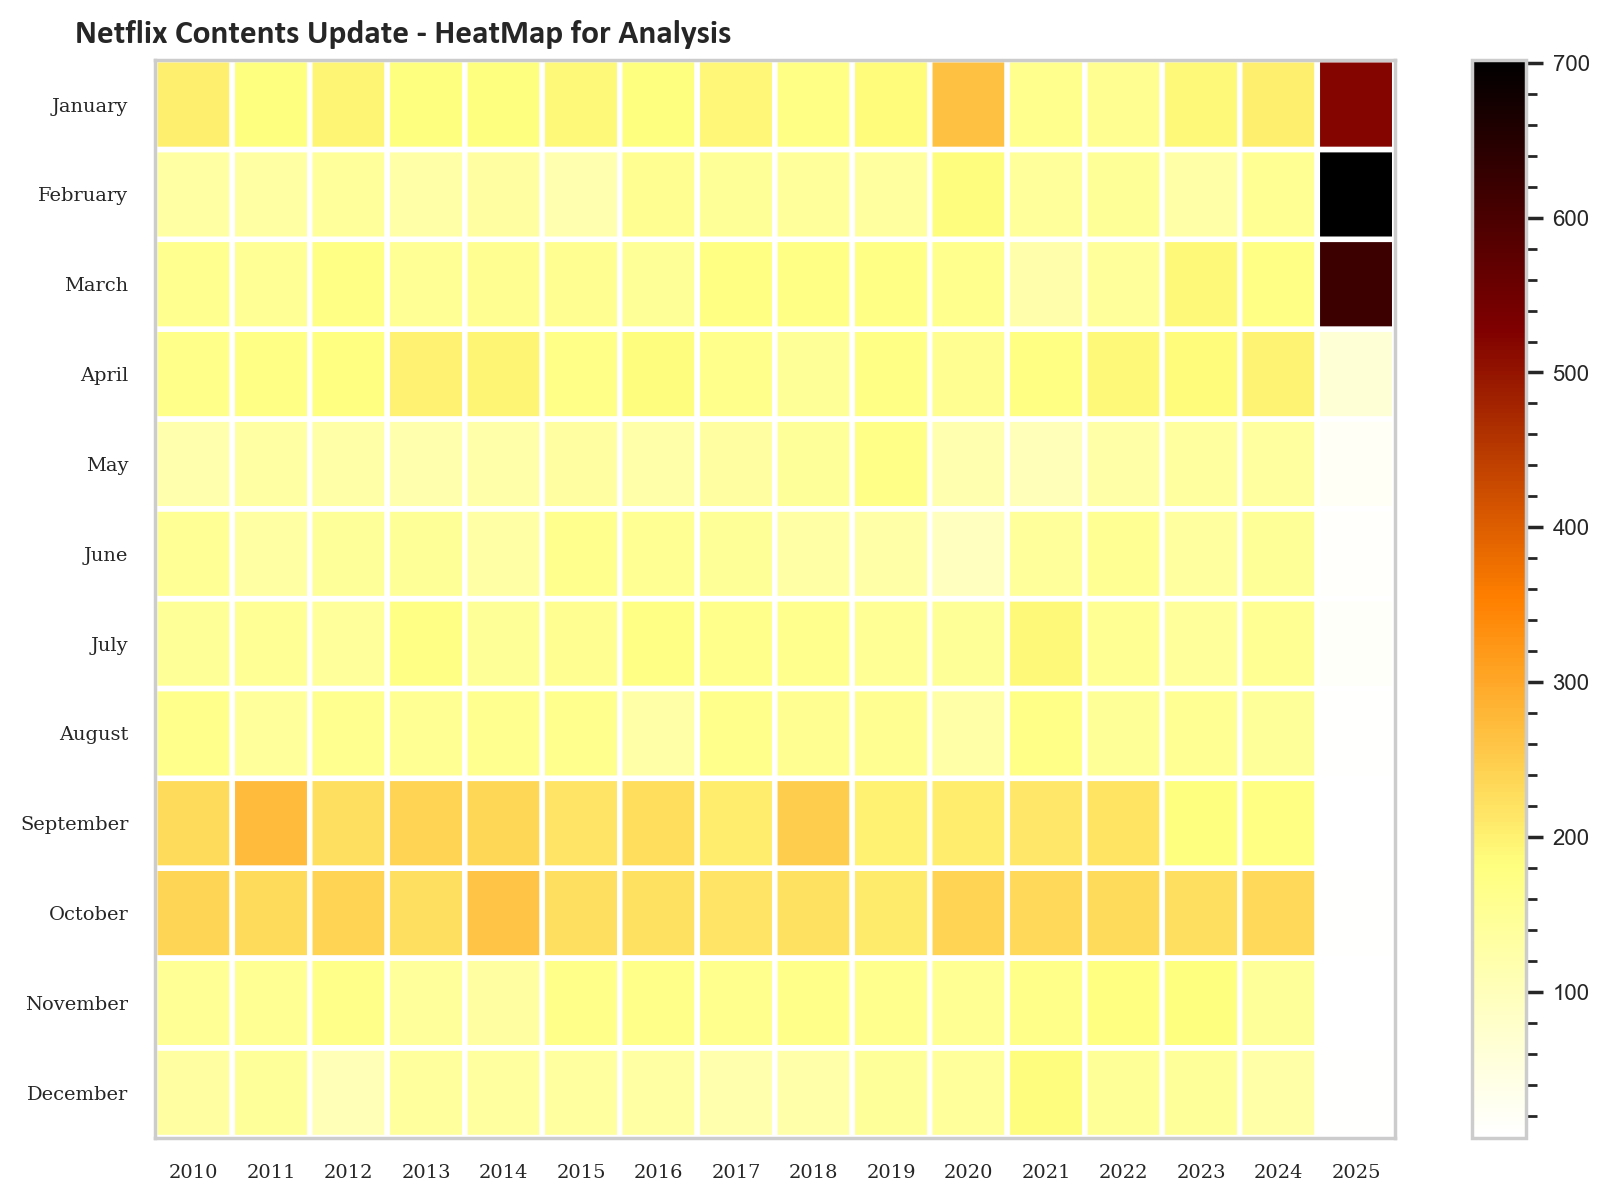

In [20]:
# Convertir a datetime, ignorar errores
netflix_date = netflix_dataset[['date_added']].dropna()
netflix_date['date_added'] = pd.to_datetime(netflix_date['date_added'], errors='coerce')

# Filtrar fechas válidas
netflix_date = netflix_date.dropna()

# Extraer año y nombre del mes
netflix_date['year'] = netflix_date['date_added'].dt.year
netflix_date['month'] = netflix_date['date_added'].dt.month_name()

# Orden de meses (de diciembre a enero)
month_order = ['December', 'November', 'October', 'September', 'August', 'July',
               'June', 'May', 'April', 'March', 'February', 'January']

# Agrupar
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

# Graficar heatmap
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2)

plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update - HeatMap for Analysis',
          fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.02))

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()

plt.show()

If the year 2020 is considered, February and June were the months when comparatively less content was released. Therefore, these months may be a good choice for the success of a new release!

## **Movie Ratings Analysis**

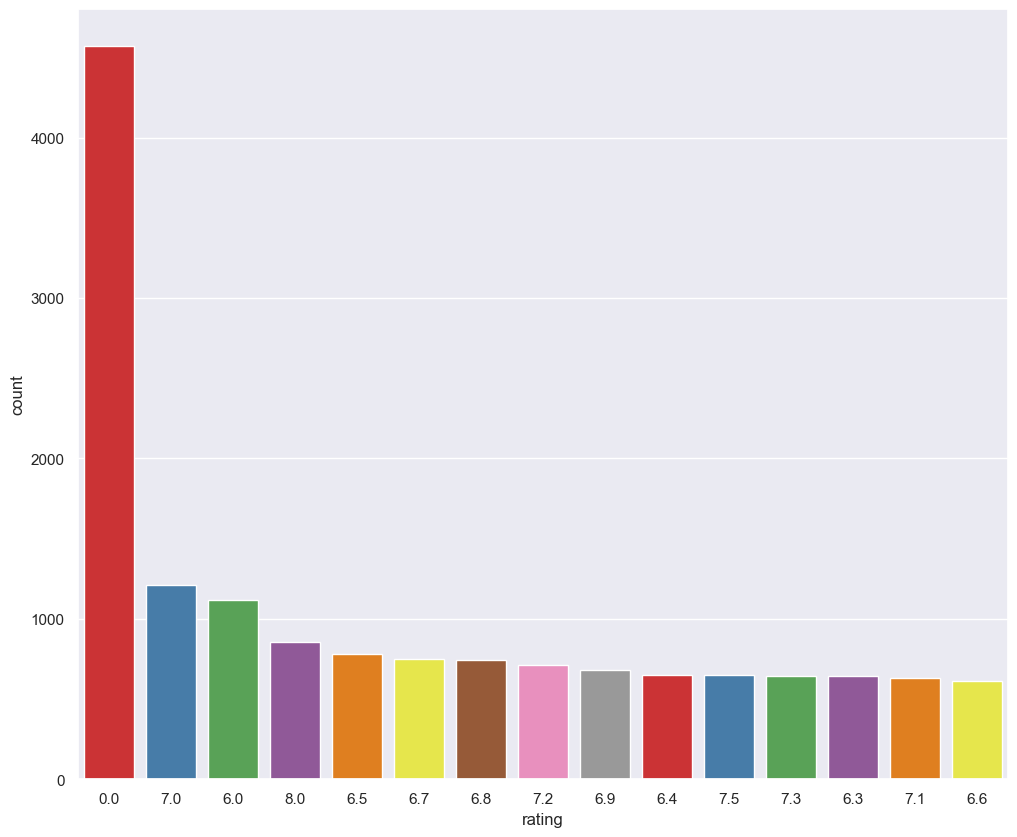

In [7]:
#Movie ratings analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_dataset, palette="Set1", order=netflix_dataset['rating'].value_counts().index[0:15])

The largest count of movies are made with the 'TV-MA' rating. "TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is the 'TV-PG' rating. Programs rated TV-PG may contain some material that parents or guardians may find inappropriate for younger children. Programs assigned a TV-PG rating may include infrequent coarse language, some sexual content, some suggestive dialogue, or moderate violence.

## **Analysing IMDB ratings to get top rated movies on Netflix**

In [26]:
imdb_ratings=pd.read_csv('IMDb ratings.csv', usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('IMDb movies.csv', usecols=['title','year','genre'])
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

(85852, 4)

Performing inner join on the ratings dataset and netflix dataset to get the content that has both ratings on IMDB and are available on Netflix.

In [27]:
ratings.dropna()
joint_data=ratings.merge(netflix_dataset,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

## **Top rated 10 movies in Netflix**

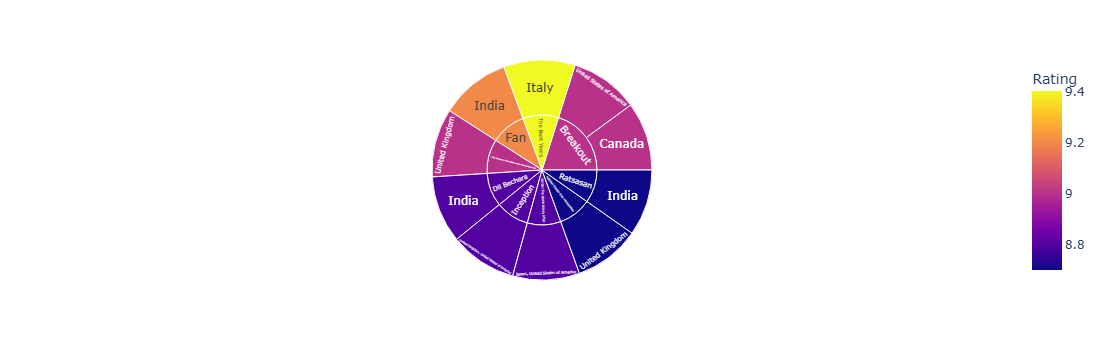

In [28]:
#Top rated 10 movies in Netflix are:
import plotly.express as px
top_rated=joint_data[0:10]
fig =px.sunburst(
    top_rated,
    path=['title','country'],
    values='Rating',
    color='Rating')
fig.show()

## **Top countries creating contents**

In [29]:
#Top countries creating contents
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,count
country,
United States of America,2753
United Kingdom,382
India,321
South Korea,260
France,222
"United Kingdom, United States of America",200
Canada,186
Japan,167
"Canada, United States of America",141


## **Year wise analysis**

In [30]:
Last_fifteen_years = netflix_dataset[netflix_dataset['release_year']>2005 ]
Last_fifteen_years.head()

,show_id,country,vote_count,duration,title,director,release_year,popularity,revenue,rating,language,vote_average,cast,genres,date_added,budget,description,type
0,33238,South Korea,187,1 Seasons,Running Man,안재철,2010,1929.898,NaN,8.241,ko,8.241,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...","Comedy, Reality",2010-07-11,NaN,A reality and competition show where members a...,TV Show
1,32415,United States of America,229,1 Seasons,Conan,NaN,2010,1670.580,NaN,7.035,en,7.035,"Conan O'Brien, Andy Richter","Talk, Comedy, News",2010-11-08,NaN,A late night television talk show hosted by C...,TV Show
2,37757,Greece,6,1 Seasons,MasterChef Greece,NaN,2010,1317.092,NaN,5.600,el,5.600,NaN,Reality,2010-10-03,NaN,MasterChef Greece is a Greek competitive cooki...,TV Show
3,75685,Czech Republic,6,1 Seasons,Prostřeno!,NaN,2010,1095.776,NaN,6.500,cs,6.500,"Václav Vydra, Jana Boušková",Reality,2010-03-01,NaN,The knives (and forks) are out as a group of s...,TV Show
4,33847,"United States of America, Ireland",12,1 Seasons,The Talk,NaN,2010,712.070,NaN,3.400,en,3.400,"Amanda Kloots, Jerry O'Connell, Akbar Gbaja-Bi...",Talk,2010-10-18,NaN,A panel of well-known news and entertainment p...,TV Show


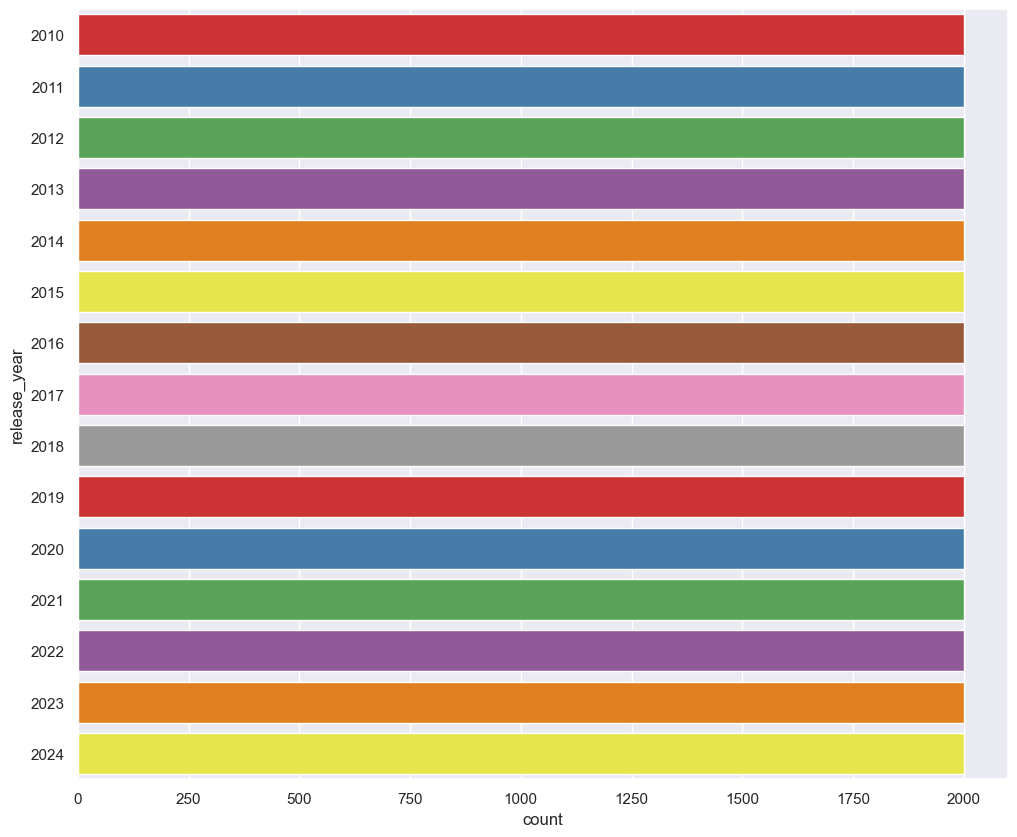

In [31]:
#Year wise analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=Last_fifteen_years, palette="Set1", order=netflix_dataset['release_year'].value_counts().index[0:15])

Thus, 2018 was the year when most of the content were released.

## **Analysis of TV Shows in Netflix** 

In [32]:
#Analysis of TV Shows in Netflix

countries={}
netflix_shows['country']=netflix_shows['country'].fillna('Unknown')
cou=list(netflix_shows['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

In [21]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

[Text(0, 0, 'UnitedStatesofAmerica'),
 Text(1, 0, 'UnitedKingdom'),
 Text(2, 0, 'France'),
 Text(3, 0, 'Canada'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'SouthKorea'),
 Text(7, 0, 'Ireland'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'Italy')]

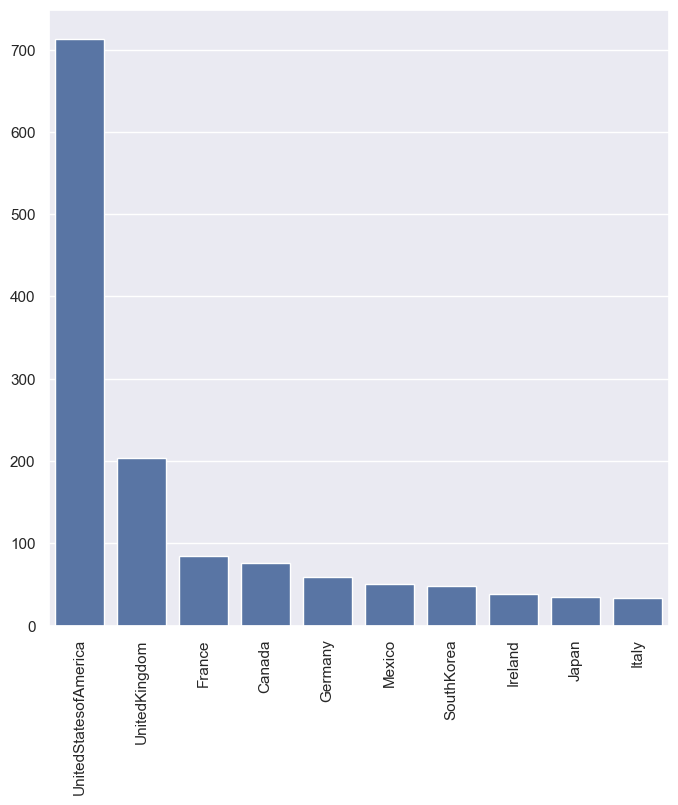

In [22]:
# Top 10 TV shows creating countries.

plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)

United States has the most TV Shows contents that were created in netflix.

## **Analysis of duration of movies** 

In [9]:
#Analysis of duration of movies

netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

ValueError: invalid literal for int() with base 10: 'nan'

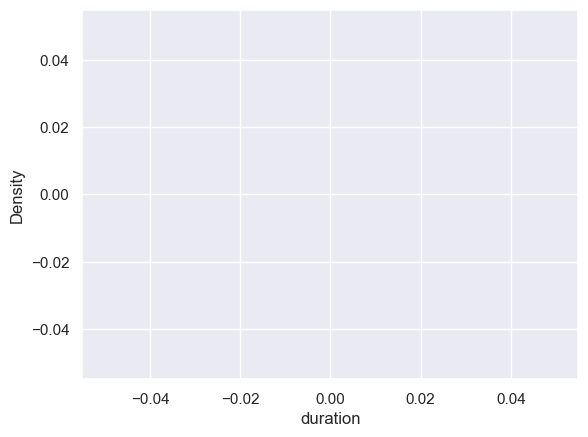

In [25]:
sns.set(style="darkgrid")
ax=sns.kdeplot(data=netflix_movies['duration'], shade=True)

So, a good amount of movies on Netflix are among the duration of 75-120 mins. It is acceptable considering the fact that a fair amount of the audience cannot watch a 3 hour movie in one sitting.

## **Analysis of duration of TV shows**

In [34]:
# Seleccionar columnas
features = ['title', 'duration']
durations = netflix_dataset[features].copy()

# Limpiar columna 'duration'
durations['no_of_seasons'] = durations['duration'].str.replace(' Season', '', regex=False)
durations['no_of_seasons'] = durations['no_of_seasons'].str.replace('s', '', regex=False)

# Eliminar filas con NaN
durations = durations.dropna(subset=['no_of_seasons'])

# Convertir a entero
durations['no_of_seasons'] = durations['no_of_seasons'].astype(int)

# Ver resultado
durations.head()

,title,duration,no_of_seasons
0,Running Man,1 Seasons,1
1,Conan,1 Seasons,1
2,MasterChef Greece,1 Seasons,1
3,Prostřeno!,1 Seasons,1
4,The Talk,1 Seasons,1


In [35]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

In [36]:
#TV shows with largest number of seasons
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

<Axes: xlabel='title'>

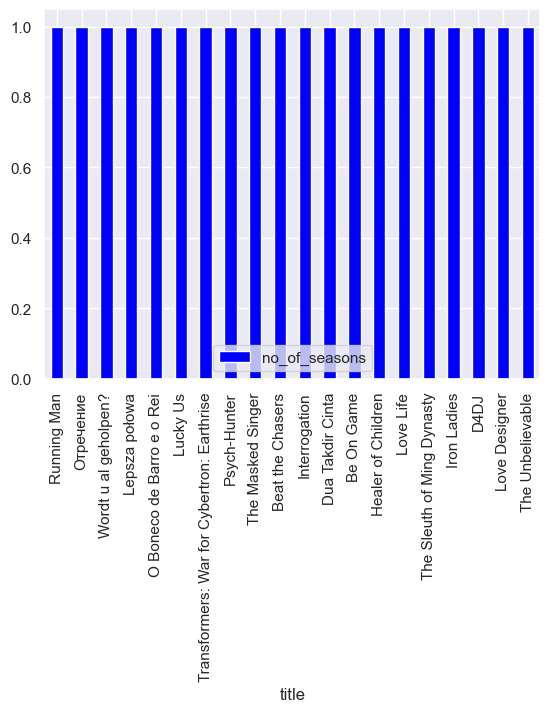

In [37]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='blue')

Thus, Grey's Anatomy, NCIS and Supernatural are amongst the tv series that have highest number of seasons.

# **Content-Based Recommendation System** 

## **Plot description based Recommender (Content Based Recommendations)**

We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the **description feature** of our dataset. Let's take a look at the data...

In [38]:
#Plot description based Recommender (Content Based Recommendations)

netflix_dataset['description'].head()

0    A reality and competition show where members a...
1    A late night television talk show hosted by  C...
2    MasterChef Greece is a Greek competitive cooki...
3    The knives (and forks) are out as a group of s...
4    A panel of well-known news and entertainment p...
Name: description, dtype: object

For any of you who has done even a bit of text processing before knows we need to convert the word vector of each description.
Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each description.

The TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF) ) score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Now if you are wondering what is **Term Frequency (TF)**, it is the relative frequency of a word in a document and is given as (term instances/total instances). **Inverse Document Frequency (IDF)** is the relative count of documents containing the term is given as log(number of documents/documents with term) The overall importance of each word to the documents in which they appear is equal to **TF * IDF**

This will give you a matrix where each column represents a word in the description vocabulary (all the words that appear in at least one document) and each row represents a movie, as before. This is done to reduce the importance of words that occur frequently in plot descriptions and therefore, their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines.

In [ ]:
#Recommedation System(Content Based)

#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Cargar datos y crear TF-IDF (ya es disperso por defecto)
tfidf = TfidfVectorizer(stop_words='english')
netflix_dataset['description'] = netflix_dataset['description'].fillna('NaN')
tfidf_matrix = tfidf.fit_transform(netflix_dataset['description'])

# Verificar el tipo de matriz (debe ser CSR o similar)
print(type(tfidf_matrix))  # Debería ser <class 'scipy.sparse.csr_matrix'>

# Convertir a float32 para ahorrar memoria (opcional)
tfidf_matrix = tfidf_matrix.astype(np.float32)
tfidf_matrix.shape

<class 'scipy.sparse._csr.csr_matrix'>


(32000, 54565)

In [40]:
f5 = tfidf_matrix[:5]
l5 = tfidf_matrix[-5:]
f5_dense = f5.toarray()
l5_dense = l5.toarray()
feature_names = tfidf.get_feature_names_out()
df_f5 = pd.DataFrame(f5_dense, columns=feature_names)
df_l5 = pd.DataFrame(l5_dense, columns=feature_names)
display(df_f5)
display(df_l5)

,00,000,000ft,007,0079,009,0096,00am,00pm,01,...,아이랜드,이달의,챔피언,탐구,ﬁnd,𝐑𝐢𝐧𝐠,𝐑𝐨𝐰𝐞𝐥,𝐨𝐟,𝐬𝐭𝐨𝐫𝐲,𝐭𝐡𝐞
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,00,000,000ft,007,0079,009,0096,00am,00pm,01,...,아이랜드,이달의,챔피언,탐구,ﬁnd,𝐑𝐢𝐧𝐠,𝐑𝐨𝐰𝐞𝐥,𝐨𝐟,𝐬𝐭𝐨𝐫𝐲,𝐭𝐡𝐞
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We see that over 17,900 different words were used to describe the 7787 movies in our dataset.

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the cosine similarity scores. There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:

**similarity = cos(x, y) = x . y / ||x|| * ||y||**

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. 

Therefore, we will use **sklearn's linear_kernel()** instead of cosine_similarities() since it is faster..

In [41]:
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity
from scipy.sparse import csr_matrix

# Calcular similitud fila por fila
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our netflix DataFrame, given its title.

In [42]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(netflix_dataset.index, index=netflix_dataset['title']).drop_duplicates()

In [46]:
def get_recommendations(title, cosine_sim=cosine_sim):
    title = title.strip().lower()
    
    if title not in indices:
        print(f"❌ Title '{title}' not found in dataset!")
        return None

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]

    return netflix_dataset['title'].iloc[movie_indices]


In [47]:
get_recommendations('Welcome')

❌ Title 'welcome' not found in dataset!


In [48]:
get_recommendations('Avengers: Infinity War')

❌ Title 'avengers: infinity war' not found in dataset!


In [49]:
get_recommendations('Dil Dhadakne Do')

❌ Title 'dil dhadakne do' not found in dataset!


While our system has done a decent job of finding movies with similar plot descriptions, the quality of recommendations is not that great. "Welcome" returns movies with similar description while it is more likely that the people who liked that movie are more inclined to enjoy other Akshay Kumar movies. This is something that cannot be captured by the present system.

Therefore, more metrics are added to the model to improve performance.

### Content based filtering on multiple metrics

Content based filtering on the following factors:

* Title
* Cast
* Director
* Listed in
* Plot

In [50]:
#Filling null values with empty string.
filledna=netflix_dataset.fillna('')
filledna.head()

,show_id,country,vote_count,duration,title,director,release_year,popularity,revenue,rating,language,vote_average,cast,genres,date_added,budget,description,type
0,33238,South Korea,187,1 Seasons,Running Man,안재철,2010,1929.898,,8.241,ko,8.241,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...","Comedy, Reality",2010-07-11,,A reality and competition show where members a...,TV Show
1,32415,United States of America,229,1 Seasons,Conan,,2010,1670.580,,7.035,en,7.035,"Conan O'Brien, Andy Richter","Talk, Comedy, News",2010-11-08,,A late night television talk show hosted by C...,TV Show
2,37757,Greece,6,1 Seasons,MasterChef Greece,,2010,1317.092,,5.600,el,5.600,,Reality,2010-10-03,,MasterChef Greece is a Greek competitive cooki...,TV Show
3,75685,Czech Republic,6,1 Seasons,Prostřeno!,,2010,1095.776,,6.500,cs,6.500,"Václav Vydra, Jana Boušková",Reality,2010-03-01,,The knives (and forks) are out as a group of s...,TV Show
4,33847,"United States of America, Ireland",12,1 Seasons,The Talk,,2010,712.070,,3.400,en,3.400,"Amanda Kloots, Jerry O'Connell, Akbar Gbaja-Bi...",Talk,2010-10-18,,A panel of well-known news and entertainment p...,TV Show


The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same

In [53]:
#Cleaning the data - making all the words lower case
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [56]:
#Identifying features on which the model is to be filtered.
features=['title','director','cast','genres','description']
filledna=filledna[features]

In [57]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head()

,title,director,cast,genres,description
0,runningman,안재철,"yoojae-suk,jeeseok-jin,kimjong-kook,haha,songj...","comedy,reality",arealityandcompetitionshowwheremembersarejoine...
1,conan,,"conano'brien,andyrichter","talk,comedy,news",alatenighttelevisiontalkshowhostedbyconano'brien.
2,masterchefgreece,,,reality,masterchefgreeceisagreekcompetitivecookinggame...
3,prostřeno!,,"václavvydra,janaboušková",reality,theknives(andforks)areoutasagroupofstrangersco...
4,thetalk,,"amandakloots,jerryo'connell,akbargbaja-biamila...",talk,apanelofwell-knownnewsandentertainmentpersonal...


We are now in a position to create our "soup" or a "bag of words" for all rows, which is a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords).


In [58]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['genres']+' '+ x['description']

filledna['soup'] = filledna.apply(create_soup, axis=1)

The next steps are the same as what we did with our plot description based recommender. 

One important difference is that we use the CountVectorizer() instead of TF-IDF. This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense.

In [59]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

In [60]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [61]:
# Reset index of our main DataFrame and construct reverse mapping as before
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [62]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_dataset['title'].iloc[movie_indices]

In [63]:
get_recommendations_new('Welcome', cosine_sim2)

KeyError: 'welcome'

In [64]:
get_recommendations_new('Avengers: Infinity War', cosine_sim2)

25001                      Avengers: Endgame
21006                Avengers: Age of Ultron
18000                           The Avengers
22001             Captain America: Civil War
23011                         Thor: Ragnarok
19012                             Iron Man 3
28056                           The Gray Man
20008    Captain America: The Winter Soldier
31066                     The Electric State
14899                                     帝霸
Name: title, dtype: object

In [65]:
get_recommendations_new('Dil Dhadakne Do', cosine_sim2)

16582    Band Baaja Baaraat
21325       Bajirao Mastani
3783         Chlapi neplačú
8379        Big Top Academy
13293         Sandık Kokusu
14377    Tu Nombre y el Mio
27347              Us Again
28704             PSK Belia
29932                   STW
18460      Jab Tak Hai Jaan
Name: title, dtype: object

In [66]:
get_recommendations_new('Under the Dome', cosine_sim2)

11134    American Horror Stories
7045                        Dark
10325        Tales from the Loop
9201                   Creepshow
4090                Inside No. 9
3201               Sleepy Hollow
8424                  The Terror
9320                   The Order
9520                    The Gift
10301                 The Island
Name: title, dtype: object

In [67]:
get_recommendations_new('The Loflovers', cosine_sim2)

KeyError: 'theloflovers'

In [69]:
get_recommendations_new('Oppenheimer', cosine_sim2)

29568    To End All War: Oppenheimer & the Atomic Bomb
25053                                     Little Women
27083                                    The Last Duel
23035                                          Dunkirk
25030                                   Ford v Ferrari
29127                                              Air
21062                          In the Heart of the Sea
12965                                      The English
18309                                           Broken
18399                                    Arthur Newman
Name: title, dtype: object

In [70]:
get_recommendations_new('Toy Story 3', cosine_sim2)

17145                     Small Fry
17071             Hawaiian Vacation
18093               Partysaurus Rex
3778                      Vale Tudo
3879                     Mônica Toy
10446                   Obake Zukan
10609                      POKÉTOON
20105    Toy Story That Time Forgot
3520      Ninja Hattori-Kun Returns
5756                  Two More Eggs
Name: title, dtype: object

We see that our recommender has been successful in capturing more information due to more metadata and has given us (arguably) better recommendations. It is more likely that Marvel or DC comics fans will like the movies of the same production house. Therefore, to our features above we can add production_company . We can also increase the weight of the director, by adding the feature multiple times in the soup.